Аппроксимировать функцию $x = x(t)$ на промежутке $[-1;1]$ двумя способами:
1. при помощи ортогональных многочленов Чебышёва I рода;
2. при помощи многочлена Тейлораа (в точке $t_0 = 0$).<br>

Число n - заданный порядок аппроксимации. Построить графики функции $x$ и полученных аппроксимаций. Ответить на следующие вопросы, обосновав ответы численно:

* какой способ дает лучшую аппроксимацию вблизи нуля?
* какой способ дает лучшую равномерную аппроксимацию на промежутке [-1,1]?
<br>


$$
17)\ x(t) = (t - 2t^2) e^{-t^2}, \ n = 4
$$


### А) Аппроксимация многочленами Чебышёва I рода

**Многочлены Чебышёва I рода в гильбертовом пространстве:** 
$$
L^{2,\xi}(-1;1), \ \xi(t) = \frac{1}{\sqrt{1-t^2}}
$$

In [145]:
import numpy as np
from sympy import *
init_printing()

p,t = symbols('p t')

p_norm = symbols('p_norm')
p_norm = [] #ортонормированные многочлены Чебышёва
norma = 0

**Нормируем ортогональный базис, образованный многочленами Чебышёва I рода:**

In [146]:
for i in range(0, 5):
    p = chebyshevt(i,t)
    norma = sqrt(integrate((p**2)*(1/sqrt(1-t**2)), (t, -1, 1)))
    p_norm.append(p/norma)

Обозначим этот полученный  ортонормированный базис следующим образом:

$$
\{T_0(t), T_1(t), ..., T_k(t), ...\}
$$

Вывод базисных полиномов:

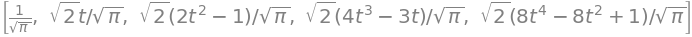

In [147]:
p_norm

**Вычислим коэффициенты Фурье для функции x:**

$$
c_k = (x, T_k)_\xi = \int_{-1}^{1} \frac{(t - 2t^2) e^{-t^2} T_k(t)}{\sqrt{1-t^2}} dt
$$

In [148]:
x,a = symbols('x a')
x = (t - 2*t**2)*exp(-t**2)
c = [] #коэф. фурье

for i in range(0, 5):
    a = simplify(x * p_norm[i] * (1/sqrt(1-t**2)))
    c.append(Integral(a,(t,-1,1)).evalf())

Вывод коэффициентов Фурье:

In [149]:
for i in range(0, 5):
    print("c_{0}= {1}".format(i,c[i]))

c_0= -0.866046594110717
c_1= 0.612387419519202
c_2= -0.440597223031023
c_3= -0.171790196488179
c_4= 0.149546732867026


**Составим для функции $x$ частичную сумму ряда Фурье (4-го порядка) по системе многочленов Чебышёва I рода:**

$$
Cheb_4(t) = \sum\limits_{k=0}^4 c_k T_k (t)
$$

In [150]:
s_k, temp = symbols('s_k temp')
s_k = [] #частичные суммы ряда Фурье

temp = c[0]*p_norm[0]
s_k.append(temp)

for i in range(1,5):
    temp = c[i]*p_norm[i]
    s_k.append(s_k[i-1] + temp)

In [151]:
s_k[4]

**Подтвердим сходимость на рисунке ниже:**

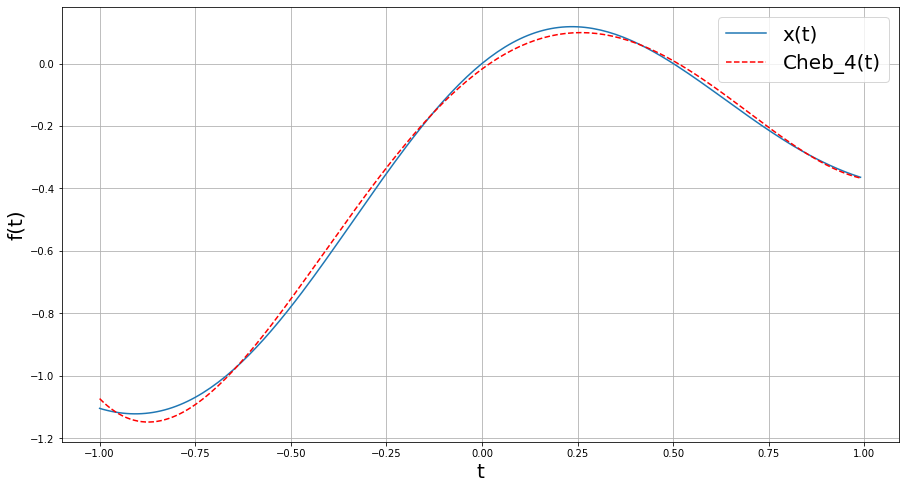

In [152]:
import math as mat
import matplotlib.pyplot as plt
%matplotlib inline

f = symbols('f')
f = (t-2*t**2)*exp(-t**2)

x = np.arange(-1, 1, 0.01)

y1 = [f.subs(t, val) for val in x]
y2 = [s_k[4].subs(t, val) for val in x]

plt.figure(figsize=(15,8))
plt.xlabel('t', fontsize = 20)
plt.ylabel('f(t)', fontsize = 20)
plt.plot(x, y1, x, y2, 'r--')
plt.legend(['x(t)', 'Cheb_4(t)'], fontsize = 20)
plt.grid()
plt.show()

### Б) Аппроксимация многочленом Тейлора

**Составим для функии $x$ многочлен Тейлора 4-ой степени в точке $t_0 = 0$:**

$$
Taylor_4(t) = x(0) + \frac{x^{'}(0)}{1!}t + \frac{x^{''}(0)}{2!}t^2 + \frac{x^{'''}(0)}{3!}t^3 + \frac{x^{''''}(0)}{4!}t^4
$$

Функция для нахождения многочлена Тейлора n-ой степени в точке $t_0$

In [153]:
from inspect import *

def f(x):
    y = (x - 2*x**2)*exp(-x**2)
    return y

x = symbols('x')

def get_polynomial(function, t0, degree):
    lines_list  = getsource(function).split("\n")
    for line in lines_list:
        if '=' in line:
            func_def = line

    elements = func_def.split('=')
    line = ' '.join(elements[1:])
    sympy_function = sympify(line)
    
    i = 0
    taylor_exp = Integer(0)
    while i <= degree:
        taylor_exp = taylor_exp + (diff(sympy_function,x,i).subs(x,t0))/(factorial(i))*(x-t0)**i
        i += 1
    return taylor_exp

taylor_4 = symbols('taylor_4')
taylor_4 = get_polynomial(f,0,4).subs(x,t)

Таким образом, получаем:

In [154]:
taylor_4

**Подтвердим сходимость на рисунке ниже:**

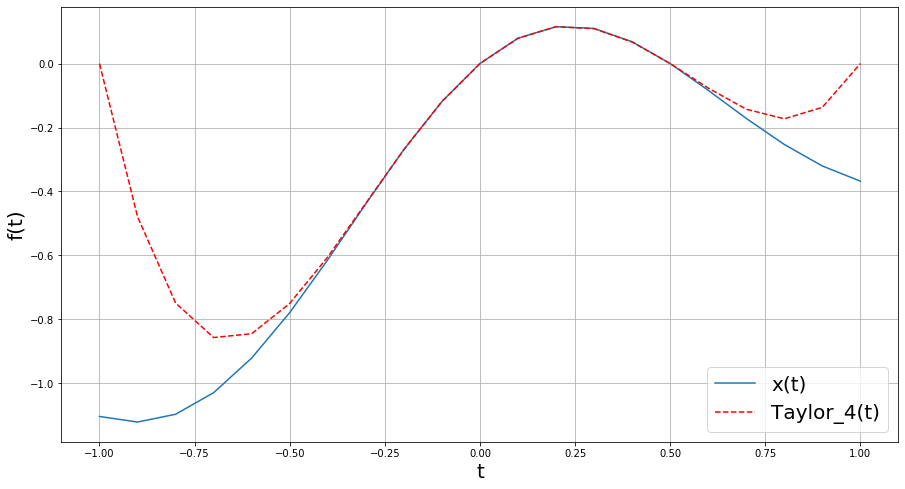

In [155]:
x = np.arange(-1, 1.1, 0.1)

y1 = [f(t).subs(t,val) for val in x]
y2 = [taylor_4.subs(t, val) for val in x]

plt.figure(figsize=(15,8))
plt.xlabel('t', fontsize = 20)
plt.ylabel('f(t)', fontsize = 20)
plt.plot(x, y1, x, y2, 'r--')
plt.legend(['x(t)', 'Taylor_4(t)'], fontsize = 20)
plt.grid()
plt.show()

## Выводы:

По графикам можно предположить, что многочлены Чебышёва I рода в целом лучше
аппроксимируют функцию $x$ на промежутке $[-1;1]$, но вблизи нуля более точную
аппроксимацию дает многочлен Тейлора. Подтвердим эти наблюдения численно.

**Оценим качество аппроксимации вблизи нуля**

**Для $t = 0$**

In [156]:
print("Cheb:{0}".format(abs(f(0) - s_k[4].subs(t,0)).n()))
print("Tayl:{0}".format(abs(f(0) - taylor_4.subs(t,0)).n()))

Cheb:0.0177477162020978
Tayl:0


$$
\begin{array}{lcl} 
    |x(0) - Cheb_4(0)| \approx 0.0177477162020978\\ 
    |x(0) - Taylor_4(0)| \approx 0\\
\end{array} 
$$



**Для $t = 0.1$**

In [157]:
print("Cheb:{0}".format(abs(f(0.1) - s_k[4].subs(t,0.1)).n()))
print("Tayl:{0}".format(abs(f(0.1) - taylor_4.subs(t,0.1)).n()))

Cheb:0.0239990474691534
Tayl:0.00000398669993344203


$$
\begin{array}{lcl} 
    |x(0.1) - Cheb_4(0.1)| \approx 0.0239990474691534\\ 
    |x(0.1) - Taylor_4(0.1)| \approx 0.00000398669993344203\\
\end{array} 
$$



**Для $t = 0.2$**

In [158]:
print("Cheb:{0}".format(abs(f(0.2) - s_k[4].subs(t,0.2)).n()))
print("Tayl:{0}".format(abs(f(0.2) - taylor_4.subs(t,0.2)).n()))

Cheb:0.0222435859534278
Tayl:0.0000947326982787960


$$
\begin{array}{lcl} 
    |x(0.2) - Cheb_4(0.2)| \approx 0.0222435859534278\\ 
    |x(0.2) - Taylor_4(0.2)| \approx 0.0000947326982787960\\
\end{array} 
$$



Действительно, вблизи нуля значения многочлена Тейлора гораздо ближе к значениям
функции $x$, чем значения аппроксимации многочленами Чебышёва

**Оценим качество равномерной аппроксимации на промежутке $[-1;1]$, вычислив расстояния в метрике $C[-1;1]$**

In [160]:
func, x_t = symbols('func x_t')
x_t = (t-2*t**2)*exp(-t**2)

func = abs(x_t - s_k[4])
max_cheb = [func.subs(t, val) for val in x]

func = abs(x_t - taylor_4)
max_tayl = [func.subs(t, val) for val in x]

In [161]:
max(max_cheb).n()

In [162]:
max(max_tayl).n()

Получаем значения:

$$
\begin{array}{lcl} 
    ||x - Cheb_4||_{C[-1;1]} = \max\limits_{t \in [-1;1]}|x(t) - Cheb_4(t)| \approx 0.0312534419450192\\ 
    ||x - Taylor_4||_{C[-1;1]} = \max\limits_{t \in [-1;1]}|x(t) - Taylor_4(t)| \approx 1.10363832351433\\ 
\end{array} 
$$



**Таким образом, многочлены Чебышёва дают более точную равномерную аппроксимацию функции $x$ на промежутке $[-1;1]$**

**P.S.**
При решении были задействованы высокоуровневый язык программирования Python 3 и его библиотеки: sympy, numpy, matplotlib, math